In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
#generate some data
np.random.seed(97)
m=50
n=2
x1 = np.array(10 * np.random.rand(1, m))
x2 = 1 + 1.5 * x1 + 0.55*np.random.randn(1, m)
y = 5*x1 + 3*x2 + 2*np.random.randn()
X = np.vstack((x1, x2))
print(X.shape, y.shape)

(2, 50) (1, 50)


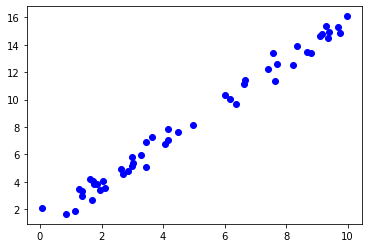

In [3]:
# Plot the points
plt.plot(X[0], X[1], ('bo'))
plt.show()

In [4]:
# I-b Find the Regression line
lin_reg = LinearRegression()
lin_reg.fit(X.T, y[0])
print('Intercept=',lin_reg.intercept_, 'Coeff =', lin_reg.coef_)
# Intercept= -0.7215577592236357 Coeff = [5. 3.]
# I-c Predict with the model
print('Prediction for (4,5):', 
lin_reg.predict([[4,5]]))
# Prediction for (4,5): [34.27844224]

Intercept= -0.7215577592236357 Coeff = [5. 3.]
Prediction for (4,5): [34.27844224]


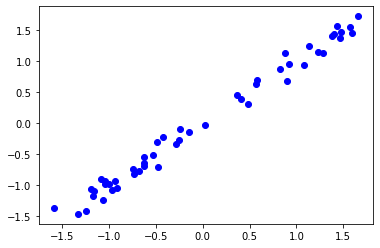

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #normalize and transform
X2 = sc.fit_transform(X.T)
X = X2.T
plt.plot(X[0], X[1], ('bo'))
plt.show()
#idendical distribution - x axis values are the only thing that have changed+

In [6]:
# I-b Find the Regression line
lin_reg = LinearRegression()
lin_reg.fit(X.T, y[0])
print('Intercept=',lin_reg.intercept_, 'Coeff =', lin_reg.coef_)
# Intercept= 48.7202349688163 Coeff = [15.22116269 13.56340123]
# I-c Predict with the model
pt = np.array([[4,5]])
pt_s = sc.transform(pt)
print(pt_s)
pred = lin_reg.predict(pt_s)
print('Prediction for (4,5):', pred)

Intercept= 48.7202349688163 Coeff = [15.22116269 13.56340123]
[[-0.29972481 -0.72840377]]
Prediction for (4,5): [34.27844224]


In [7]:
#the problem and the prediction remain the same even after adjusting the data to center around on 0,0

In [8]:
# II-a Compute the Eigenvalues /Eigenvectors
sigma = np.dot(X, X.T)
v, W = np.linalg.eig(sigma)
print('Eigenvalues: v=\n', v, '\n')
print('Eigenvectors W=\n', W, '\n')
# Sort the Eigenvectors (in reverse) Need to order in decreasing value
v_indices = np.argsort(v)[::-1]
v = v[v_indices]
W = W[:,v_indices]
print('Sorted\n', 'v=',v,'\n', 'W=',W)

Eigenvalues: v=
 [ 0.35165323 99.64834677] 

Eigenvectors W=
 [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]] 

Sorted
 v= [99.64834677  0.35165323] 
 W= [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


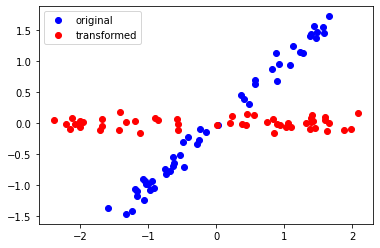

In [9]:
# II-b Transform the original data using the entire Eigenvectors matrix
Xa = np.dot(W.T, X)
plt.plot(X[0], X[1], ('bo'), label='original')
plt.plot(Xa[0], Xa[1], ('ro'), label='transformed')
plt.legend(loc="upper left")
plt.show()

In [10]:
# II-c Find regression line corresponding to the transformed dataset
lin_reg2 = LinearRegression()
lin_reg2.fit(Xa.T, y[0])
print('Intercept=',lin_reg2.intercept_, 'Coeff =', lin_reg2.coef_)
# Intercept= 48.7202349688163 Coeff = [-20.35376034  -1.17221437]
# II-d Predict with the model
pt_s_t = np.dot(W.T, pt_s.T)
pred_a = lin_reg2.predict(pt_s_t.T); print(pred_a)
# [34.27844224]

Intercept= 48.7202349688163 Coeff = [-20.35376034  -1.17221437]
[34.27844224]


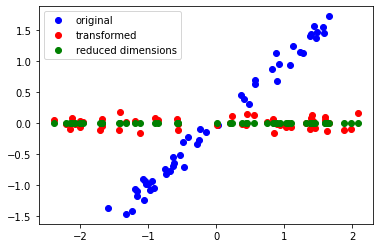

In [11]:
# III-a Transform data using only the first Eigenvector
Wr = W[:, 0]
Xb = np.dot(Wr.T, X)
plt.plot(X[0], X[1], ('bo'), label='original')
plt.plot(Xa[0], Xa[1], ('ro'), label='transformed')
plt.plot(Xb, np.zeros(len(Xb)), ('go'), label='reduced dimensions')
plt.legend(loc="upper left")
plt.show()

In [12]:
# III-b Fit a regression line model
lin_regb = LinearRegression()
lin_regb.fit(Xb.reshape(-1,1), y[0])
print(lin_regb.intercept_, lin_regb.coef_)
# 48.7202349688163 [-20.35376034]
# III-c Prediction
pt_s_t2 = np.dot(Wr.reshape(-1, 1).T, pt_s.T)
print(pt_s_t2)
#[[0.72699669]]
pred_b = lin_regb.predict(pt_s_t2.T)
print('Prediction for (4,5):', pred_b)
# Prediction for (4,5): [33.92311851]

48.7202349688163 [-20.35376034]
[[0.72699669]]
Prediction for (4,5): [33.92311851]


In [13]:
# III-d Comparing prediction in III to the ones in I and II
pct_change = 100 * abs(pred_a - pred_b) / pred_b
print(pct_change[0], '%')
# 1.047438298401588 %

1.0474382984015875 %


In [14]:
U, s, VT = np.linalg.svd(X)
print('Eigenvectors:, U\n', U, U.shape,'\n')
print('Eigenvalues: s=', s, s.shape,'\n')
print('Eigenvectors: VT=\n', VT.shape,'\n')

print('Eigenvectors W=\n', W, W.shape, '\n')


Eigenvectors:, U
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]] (2, 2) 

Eigenvalues: s= [9.98240185 0.59300356] (2,) 

Eigenvectors: VT=
 (50, 50) 

Eigenvectors W=
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]] (2, 2) 



In [15]:
# Asserting that 𝑋=𝑈 Σ 𝑉^𝑇
Sigma = np.zeros((X.shape[0], X.shape[1]))
Sigma[:X.shape[0], :X.shape[0]] = np.diag(s)
Xc = np.dot(U, np.dot(Sigma, VT))
print(np.allclose(X, Xc))
# True

np.allclose( np.identity(2), np.dot(U, U.T) )
# True
np.allclose( np.identity(50), np.dot(VT, VT.T) )
# True


True


True

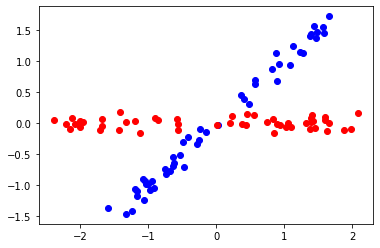

[34.27844224]


LinearRegression()

In [16]:
# transforming X, using the first 2 Eigenvectors
plt.plot(X[0], X[1], ('bo'))
Xall = np.dot(U.T, X)
plt.plot(Xall[0], Xall[1], ('ro'))
plt.show()

# Making a prediction, using the entire
# transformed dataset
Xc = np.dot(U.T,  X)
lrg = LinearRegression()
lrg.fit(Xc.T, y[0])

pt1_s_t = np.dot(U.T, pt_s.T)
pred_a = lrg.predict(pt1_s_t.T); print(pred_a)
# [34.27844224]

# Approximate X by using only the first Eigenvector
Ur = U[:, 0]
Xr = np.dot(Ur.T,  X).reshape(1,50)
lrg = LinearRegression()
lrg.fit(Xr.T, y[0])


In [17]:
pt_s_t2 = np.dot(Ur.reshape(-1, 1).T, pt_s.T)
print(pt_s_t2)
# [[0.72699669]]

pred_b = lrg.predict(pt_s_t2.T)
print('Prediction for (4,5):', pred_b)
# Prediction for (4,5): [33.92311851]

pct_change = 100 * abs(pred_a - pred_b) / pred_b
print(pct_change[0], '%')
# 1.047438298401567 %


[[0.72699669]]
Prediction for (4,5): [33.92311851]
1.0474382984015669 %


In [18]:
#apply to IRIS Dataset - can we predict with a smaller number of variables
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
X = X.T
feature_names = list(iris.feature_names)
target_names = list(iris.target_names)
print('X.shape=', X.shape)
print('y.shape=', y.shape, '\n')
print('feature_names=\n', feature_names, '\n')
print('target_names=\n', target_names)


X.shape= (4, 150)
y.shape= (150,) 

feature_names=
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

target_names=
 ['setosa', 'versicolor', 'virginica']


In [20]:
# Using PCA to find the Eigenvalues and Eigenvectors
C = np.dot(X, X.T)
v, w = np.linalg.eig(C)
print('Eigen-values: v=\n', v,'\n')
print('Eigen-vectors: w=\n', w)
#Eigen-values: v=
# [9.20653060e+03   3.14103073e+02   1.20360193e+01   3.53031167e+00] 
#Eigen-vectors: w=
 #[[ 0.75116805    0.28583096    0.49942378    0.32345496]
 #[ 0.37978837     0.54488976    -0.67502499   -0.32124324]
 #[ 0.51315094    -0.70889874    -0.05471983   -0.48077482]
 #[ 0.16787934   -0.34475845     -0.54029889    0.74902286]]


Eigen-values: v=
 [9.20830507e+03 3.15454317e+02 1.19780429e+01 3.55257020e+00] 

Eigen-vectors: w=
 [[ 0.75110816  0.2841749   0.50215472  0.32081425]
 [ 0.38008617  0.5467445  -0.67524332 -0.31725607]
 [ 0.51300886 -0.70866455 -0.05916621 -0.48074507]
 [ 0.16790754 -0.34367081 -0.53701625  0.75187165]]


In [21]:
# Using Singular-value decomposition
U, s, VT = np.linalg.svd(X)
print('Eigen-vectors: U=\n', U, U.shape,'\n')
print('Eigen-values: s=', s, s.shape)
print('Eigen-vectors: VT=', VT.shape,'\n')


Eigen-vectors: U=
 [[-0.75110816 -0.2841749   0.50215472  0.32081425]
 [-0.38008617 -0.5467445  -0.67524332 -0.31725607]
 [-0.51300886  0.70866455 -0.05916621 -0.48074507]
 [-0.16790754  0.34367081 -0.53701625  0.75187165]] (4, 4) 

Eigen-values: s= [95.95991387 17.76103366  3.46093093  1.88482631] (4,)
Eigen-vectors: VT= (150, 150) 



In [22]:
#Let’s take the first two columns (Principle Components) of U and call it Ur
Ur = -U[:, 0:2]
print('Ur=\n', Ur)
wr = w[:, 0:2]
print('wr=\n', wr)
np.allclose(Ur, wr)   # True


Ur=
 [[ 0.75110816  0.2841749 ]
 [ 0.38008617  0.5467445 ]
 [ 0.51300886 -0.70866455]
 [ 0.16790754 -0.34367081]]
wr=
 [[ 0.75110816  0.2841749 ]
 [ 0.38008617  0.5467445 ]
 [ 0.51300886 -0.70866455]
 [ 0.16790754 -0.34367081]]


True

In [26]:
#Project the data X onto the reduced matrix Ur:
Xr = np.dot(X.T, Ur)
X.shape, Xr.shape

((4, 150), (150, 2))

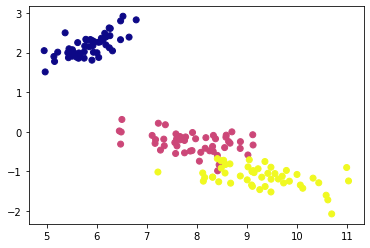

In [28]:
plt.scatter(Xr[:,0], Xr[:,1], c=y, cmap='plasma')
plt.show()


ValueError: x and y must have same first dimension, but have shapes (6,) and (5,)

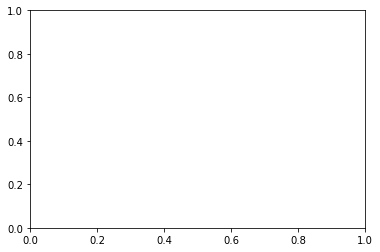

In [30]:
# The Scree plot
sv = np.cumsum(s)/sum(s)
#np.insert(sv, 0, 0) #- insert the value 0 in position 0 of array sv
sv = np.insert(sv, 0, 0)
plt.step(list(range(len(sv)+1)), sv)
plt.show()
print('sv =', sv)


In [31]:
Sigma = np.zeros((X.shape[0], X.shape[1]))
Sigma[:X.shape[0], :X.shape[0]] = np.diag(s)
Xa = U.dot(Sigma.dot(VT))
print(Xa.shape)
res = np.allclose(X, Xa)
print('Is X equal to Xa? ', res)


(4, 150)
Is X equal to Xa?  True


In [32]:
# Using Scikit-Learn Logistic Regression with the Iris Dataset
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
X1 = X.T
print(X1.shape, y.shape)
ovrc = OneVsRestClassifier(LinearSVC(random_state=0))
ovrc.fit(X1, y)
predict = ovrc.predict(X1)
from sklearn import metrics
cm = metrics.confusion_matrix(y, predict)
print('Confusion matrix:\n', cm)
print('Accuracy:', metrics.accuracy_score(y, predict))


(150, 4) (150,)
Confusion matrix:
 [[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
Accuracy: 0.9666666666666667


C:\Users\emmasch\Anaconda3\envs\tf2\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\emmasch\Anaconda3\envs\tf2\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [33]:
# Using Xr
ovrc = OneVsRestClassifier(LinearSVC(random_state=0))
ovrc.fit(Xr, y)
predict = ovrc.predict(Xr)
from sklearn import metrics
cm = metrics.confusion_matrix(y, predict)
print('Confusion matrix:\n', cm)
print('Accuracy:', metrics.accuracy_score(y, predict))


Confusion matrix:
 [[50  0  0]
 [ 0 46  4]
 [ 0  0 50]]
Accuracy: 0.9733333333333334


C:\Users\emmasch\Anaconda3\envs\tf2\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\emmasch\Anaconda3\envs\tf2\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [34]:
#apply using SciKit Learn

In [35]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import Dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


In [36]:
# Exploring the dataset
cancer.keys()
print(cancer['DESCR'])


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [37]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df.head(2)
cancer['target'][0:25]

cancer['target_names']


array(['malignant', 'benign'], dtype='<U9')

In [38]:
# Scale Dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
sc_data = sc.transform(df)


(569, 30) (569, 2)


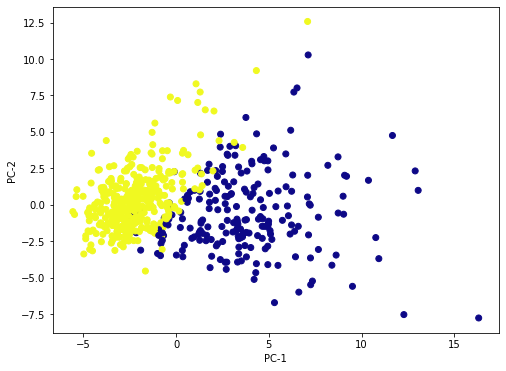

In [42]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(sc_data)
xpca = pca.transform(sc_data)
print(sc_data.shape, xpca.shape)
# we have dropped all but 2 dimmensions from 30

# Visualize Data
plt.figure(figsize=(8,6))
plt.scatter(xpca[:,0], xpca[:,1], c=cancer['target'], cmap='plasma')
plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.show()


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.218902      0.103725        0.227537   0.220995         0.142590   
1    -0.233857     -0.059706       -0.215181  -0.231077         0.186113   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.239285        0.258400             0.260854       0.138167   
1          0.151892        0.060165            -0.034768       0.190349   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.064363  ...      0.227997       0.104469         0.236640   
1                0.366575  ...     -0.219866      -0.045467        -0.199878   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.224871          0.127953           0.210096         0.228768   
1   -0.219352          0.172304           0.143593         0.097964   

   worst concave points  worst symmetry  worst fractal dimension  
0              0.250886

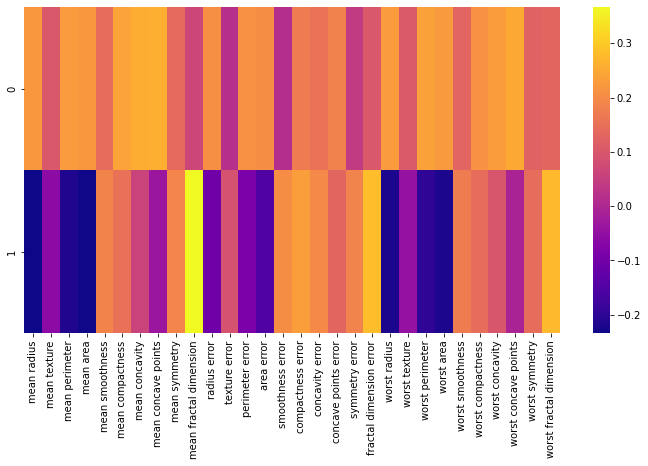

In [40]:
# Show Eigenvectors
df_components = pd.DataFrame(pca.components_,columns=cancer['feature_names'])
print(df_components)
plt.figure(figsize=(12,6))
sns.heatmap(df_components, cmap='plasma')
plt.show()


[[207   5]
 [  2 355]]
0.9876977152899824


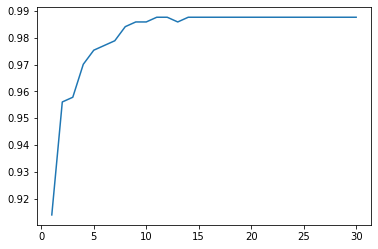

In [43]:
from sklearn.linear_model import LogisticRegression
logisticRegr=LogisticRegression()
score_list = []
for nc in range(1, sc_data.shape[1]+1):
    pca = PCA(n_components = nc)
    xpca = pca.fit_transform(sc_data)
    logisticRegr.fit(xpca, cancer['target'])
    predictions = logisticRegr.predict(xpca)
    score = logisticRegr.score(xpca, cancer['target'])
    #print('score =', score) ; print(pca.components_.shape)
    score_list.append(score)
cm = metrics.confusion_matrix(cancer['target'], predictions)
print(cm)
plt.plot(range(1,len(score_list)+1), score_list)
print(score_list[-1])    # 0.9876977152899824
# you can retain another 2-5% by utalizing 5 dimmensions
